# Chapter 2 - Golan Heights
## Hanna Asefaw

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import timescalePlotter as ts_plotter
import pygmt
import pmagpy.pmag as pmag

In [2]:
# import the data
gh_data = pd.read_csv("./PISites.csv")
ant_data = pd.read_csv("./AntarcticaPISites.csv")
collab_data = pd.read_csv("./collaborator_studies.csv")

ice_data = collab_data[collab_data['author'] == "Cromwell et al. 2014"]
ice_data = ice_data.dropna(subset = ["int", "vadm"])

In [3]:
# Golan Heights summary 
n = gh_data.site.size
b = gh_data['int'].mean()
b_std= gh_data['int'].std()
b_stderr = b_std/np.sqrt(n)
b_median = gh_data['int'].median()

print("Total Sites: \t\t", n)

print("\n\nMean Intensity:\t\t", round(b,2))
print("Standard deviation:\t", round(b_std,2))
print("Std Error intensity:\t", round(b_stderr,2))
print("Median:\t\t\t", round(b_median,2))
      
      
vadm = gh_data['vadm'].mean()
vadmStd = gh_data['vadm'].std()
vadmStdError= vadmStd/np.sqrt(n)
vadmMedian = gh_data['vadm'].median()

print("\n\nMean VADM:\t\t", round(vadm,2))
print("Standard deviation:\t", round(vadmStd,2))
print("Std Error VADM:\t\t", round(vadmStdError,2))
print("Median:\t\t\t", round(vadmMedian,2))

Total Sites: 		 16


Mean Intensity:		 34.4
Standard deviation:	 12.59
Std Error intensity:	 3.15
Median:			 32.54


Mean VADM:		 64.61
Standard deviation:	 23.6
Std Error VADM:		 5.9
Median:			 61.06


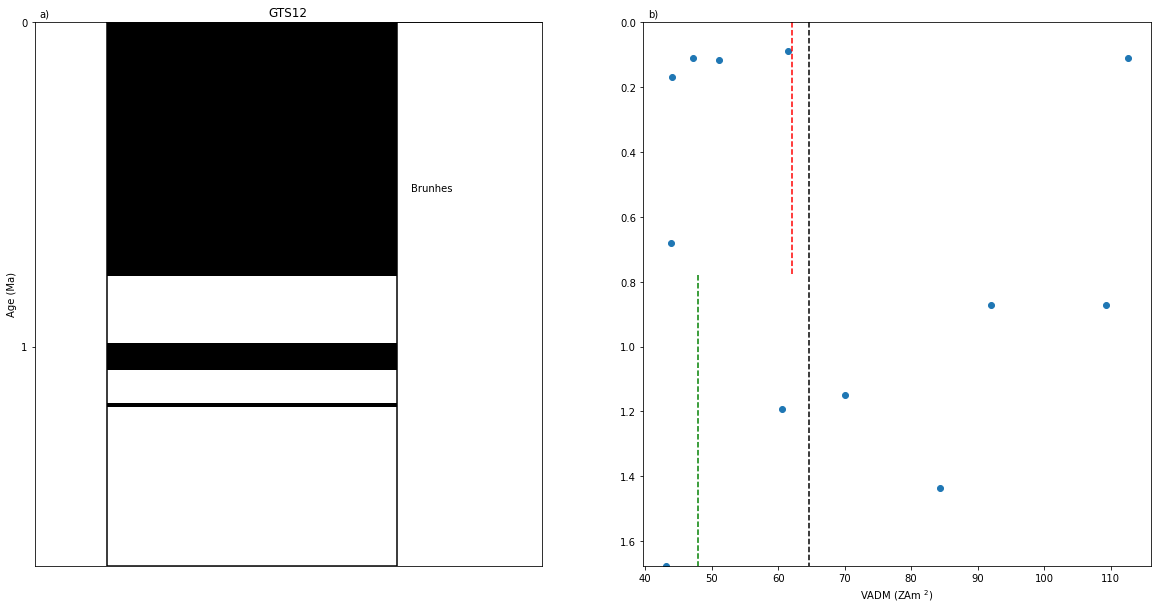

In [4]:
# golan heights- geomagnetic polarity timescale and vadms
fig = plt.figure(2, (20, 10))
maxAge = gh_data['age'].max()/1000

#gpts
ax=fig.add_subplot(121)
labels = ["Brunhes", "Matuyama", "Gauss", "Gilbert", ""]
bounds = [0,.78, 2.59,3.6,5.33, 10]
ts_plotter.modified_do_TS(ax,0.,maxAge, label=labels, labelbounds = bounds )

ax.set_ylim(0,maxAge)
ax.invert_yaxis()
ax.set_ylabel("Age (Ma)")
ax.text(.01,1.01,'a)',transform=ax.transAxes)



#vadm
ax=fig.add_subplot(122)
plt.plot(gh_data['vadm'], gh_data['age'].values/1000, 'o')
plt.xlabel("VADM (ZAm $^2$)")
plt.ylim(0,maxAge)
frame1 = plt.gca()
frame1.axes.set_ylabel("")
ax.invert_yaxis()
ax.text(.01,1.01,'b)',transform=ax.transAxes)



plt.plot([62,62],[0,.78],'r--') # from Ziegler et al
plt.plot([48,48],[.78,10],'g--')# from Ziegler et al

mean_vadm = gh_data['vadm'].mean()
plt.plot([mean_vadm,mean_vadm],[0,maxAge],'k--');

In [5]:
# similar studies summary
datasets = [gh_data, ant_data, ice_data]
study = ['Golan Heights', "Antarctica", "Iceland"]

for data, loc in zip(datasets, study):
    print(loc)
    print("\t {:.2f} \u00B1  {:.2f} \u03BCT".format(data['int'].mean(), data['int'].std()/np.sqrt(data['int'].size)))
    print("\t {:.2f} \u00B1  {:.2f} ZAm^2".format(data['vadm'].mean(), data['vadm'].std()/np.sqrt(data['vadm'].size)))
    print("") 

Golan Heights
	 34.40 ±  3.15 μT
	 64.61 ±  5.90 ZAm^2

Antarctica
	 33.01 ±  2.59 μT
	 43.40 ±  3.41 ZAm^2

Iceland
	 42.94 ±  1.05 μT
	 59.90 ±  1.46 ZAm^2



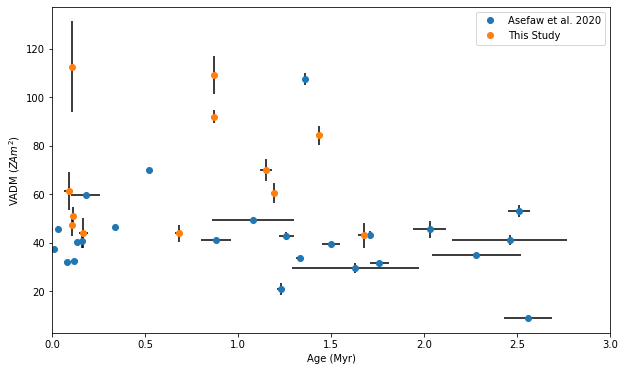

In [6]:
# vadm vs. age (golan heights and antarctica)
plt.figure(1, (10,6))
plt.plot(ant_data['age'],ant_data['vadm'], "o" , label = "Asefaw et al. 2020")
for i in range(ant_data['age'].size):
    plt.errorbar(ant_data['age'].values[i],ant_data['vadm'].values[i], xerr = ant_data['age_sigma'].values[i], yerr = ant_data['vadm_sigma'].values[i], color="k")
    
    
plt.plot( gh_data['age']/1000, gh_data['vadm'],"o", label = "This Study")
for i in range(gh_data['vadm'].size):
    plt.errorbar( gh_data['age'].values[i]/1000,gh_data['vadm'].values[i], xerr= gh_data['age_sigma'].values[i]/1000, yerr=gh_data['vadm_sigma'].values[i], color = "k")

    
plt.xlim([0,3])
    
plt.ylabel("VADM ($ZAm^2$)")
plt.xlabel("Age (Myr)")
plt.legend();

In [7]:
# PINT database- filter 
pint = pd.read_csv("./PINT15.csv")
pint = pint.dropna(subset = ["DF%", "DF", "VDM/VADM"])
pint['VDM/VADM']*=10



int_m_filter= ['LTD-T+', "M+", "ST+", "T+", "WT+"]
n_filter = 3
df_perc_filter= 10
df_filter = 4
age_filter = 5



pint = pint[pint['IntM'].isin(int_m_filter) & (pint['AGE']<=age_filter) ]
pint= pint[(pint['Nint']>=n_filter)  & ((pint['DF%']<=df_perc_filter) | (pint['DF']<=df_filter))]
print("N = {} \t pint filtered 0 - 5 Myr".format(pint['AGE'].size))

N = 328 	 pint filtered 0 - 5 Myr


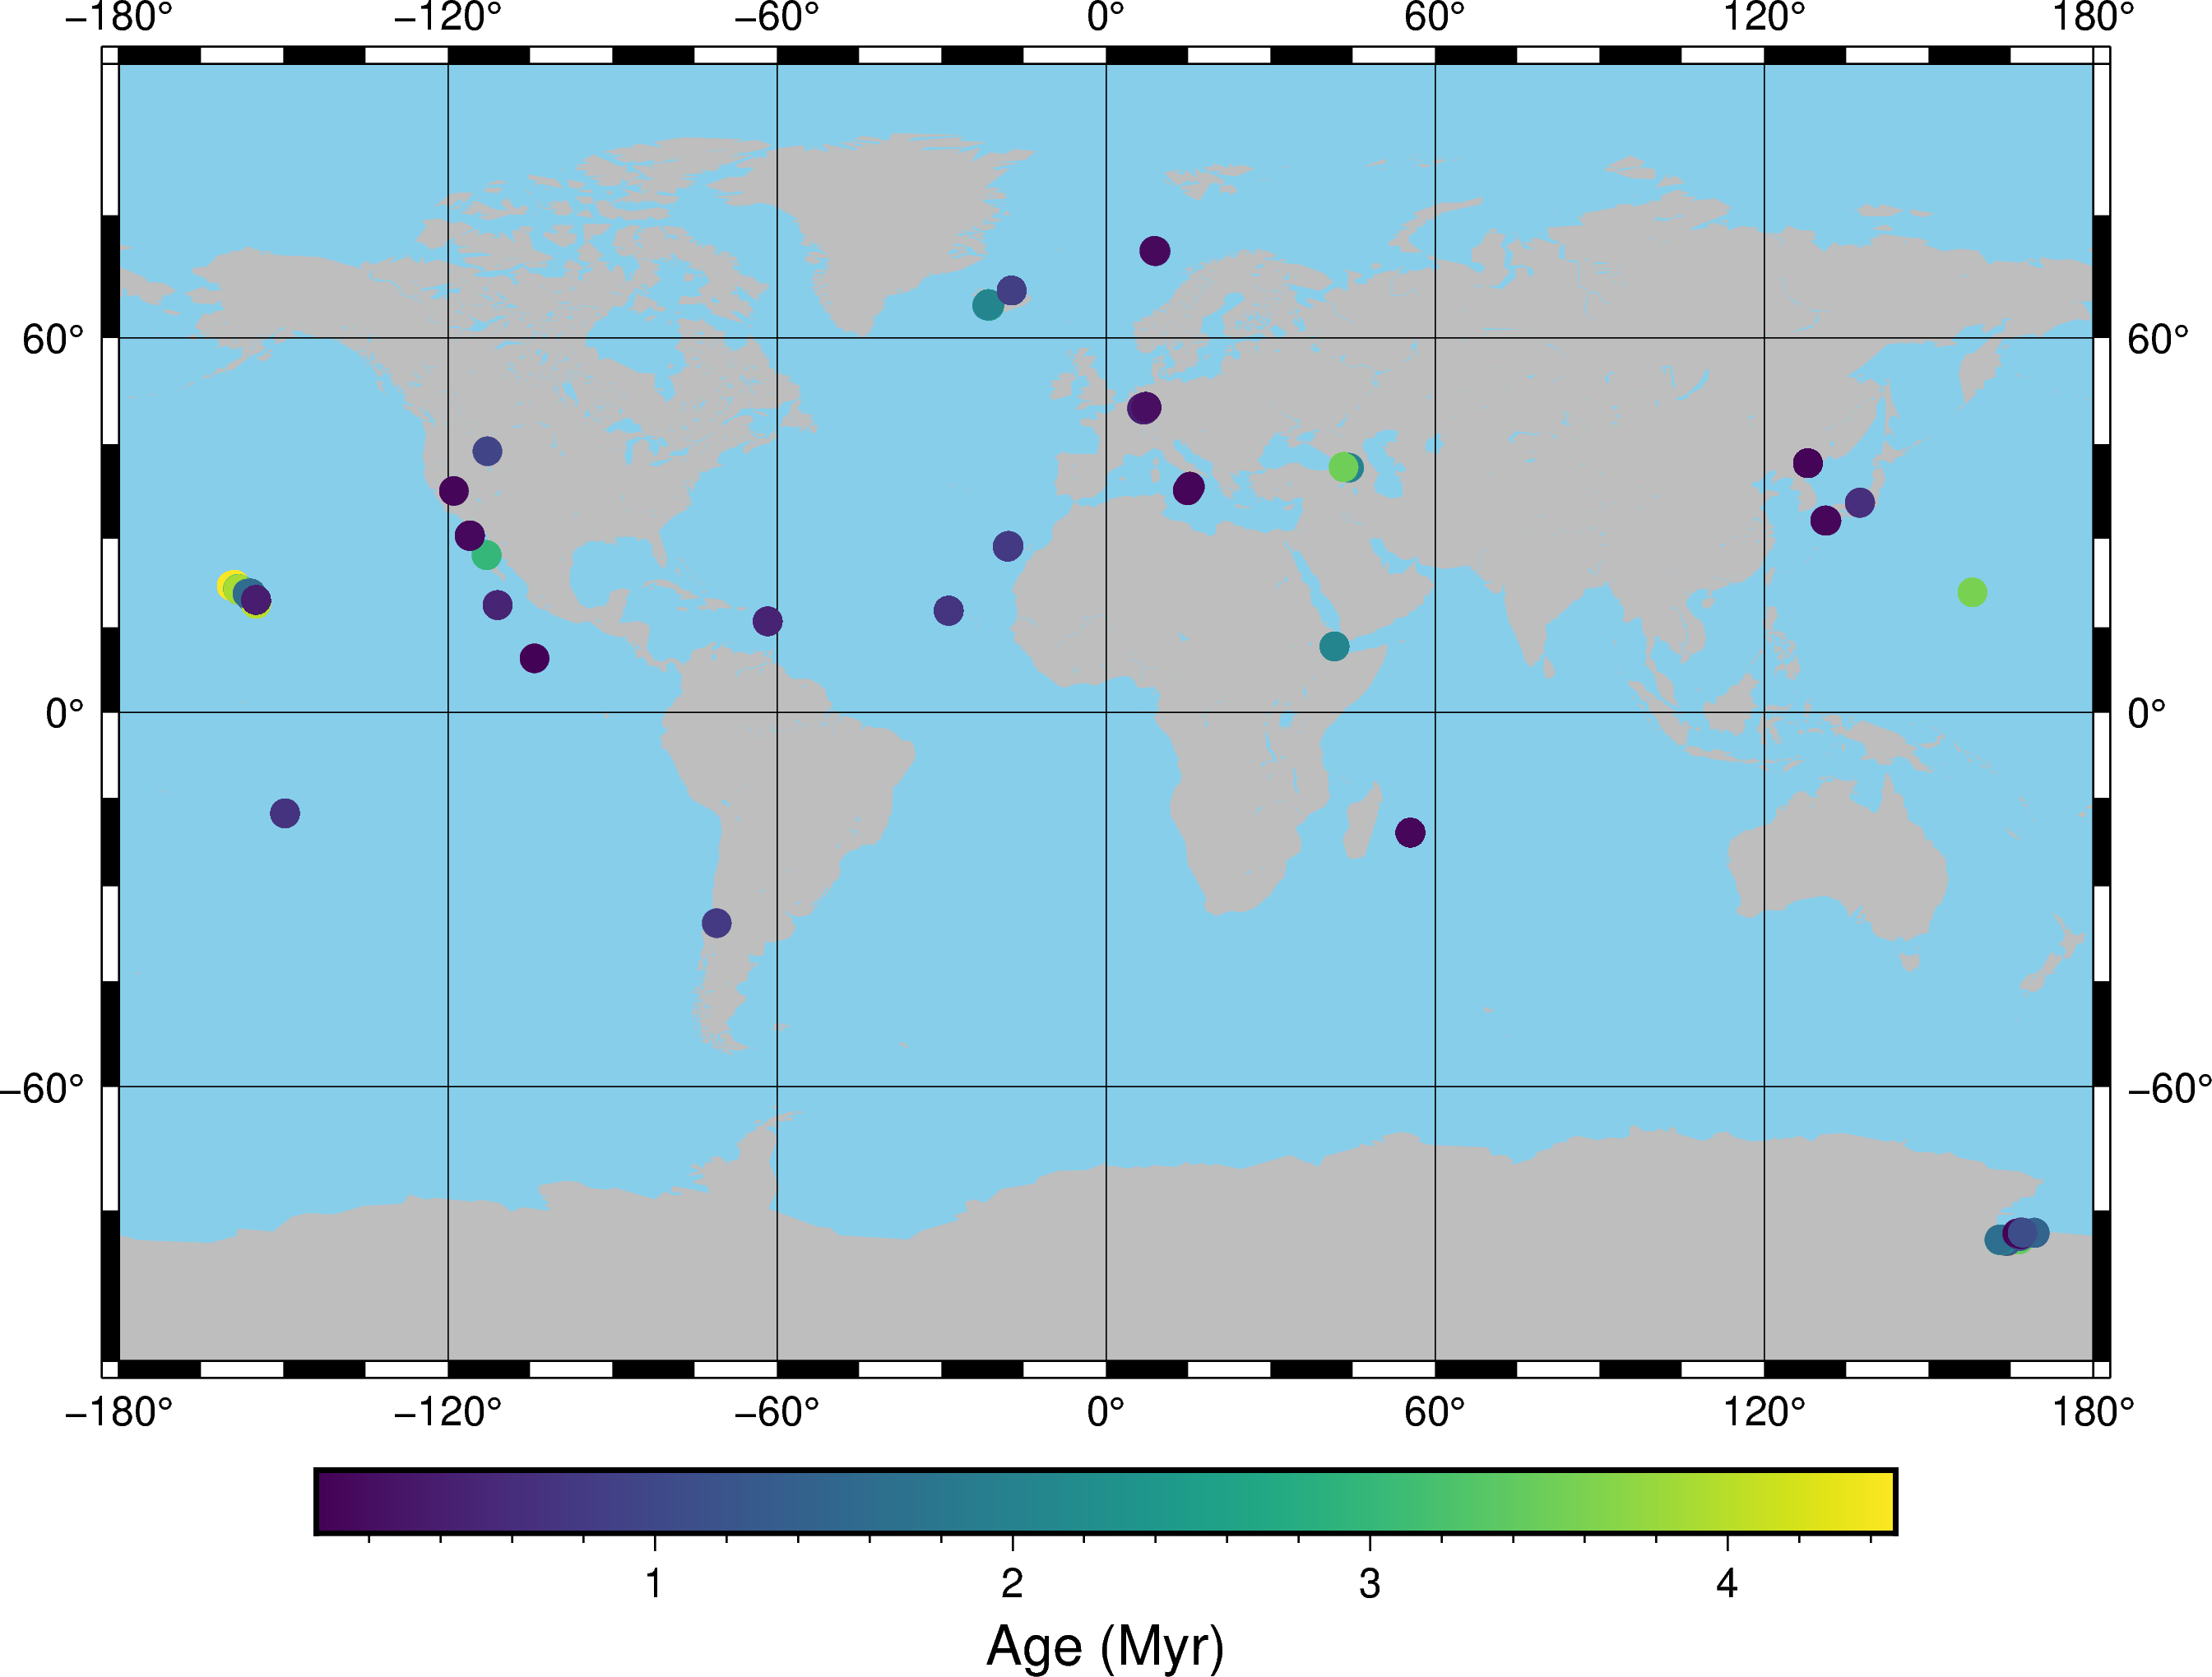

<Figure size 720x504 with 0 Axes>

In [8]:
# filtered PINT- spatial and temporal distribution
plt.figure(5, (10,7))
fig = pygmt.Figure()

fig.coast(region = "g", frame = "afg", projection = "Cyl_stere/0/-20/8i" ,land = "gray", water = "skyblue")

pygmt.makecpt(cmap = "viridis", series = [pint['AGE'].min(), pint['AGE'].max()])
fig.plot(x = pint['SLONG'].values, y = pint['SLAT'].values , style = "c0.3c", color =pint['AGE'].values, cmap= True)
fig.colorbar(frame = 'af+l"Age (Myr)"')
fig.show(width =1000)

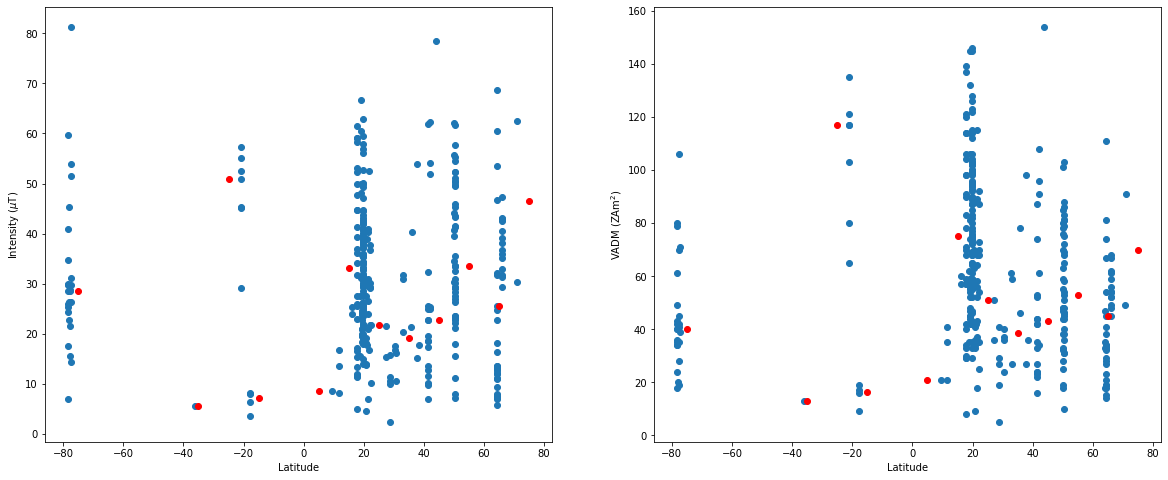

In [9]:
# filtered PINT- intensity and vadm vs. latitude
lat_range = np.arange(-90, 95, 10)

plt.figure(3, (20,8))
plt.subplot(121)
plt.plot(pint['SLAT'], pint['F'], "o")

medianIntensity = pint.groupby(pd.cut(pint['SLAT'], lat_range)).median()['F']
plt.plot(lat_range[:-1]+5, medianIntensity.values, "ro")

plt.xlabel("Latitude")
plt.ylabel("Intensity ($\mu$T)")


plt.subplot(122)
plt.plot(pint['SLAT'], pint['VDM/VADM'], "o")

medianVADM = pint.groupby(pd.cut(pint['SLAT'], lat_range)).median()['VDM/VADM']
plt.plot(lat_range[:-1]+5, medianVADM.values, "ro")


plt.xlabel("Latitude")
plt.ylabel("VADM (ZAm$^2$)");

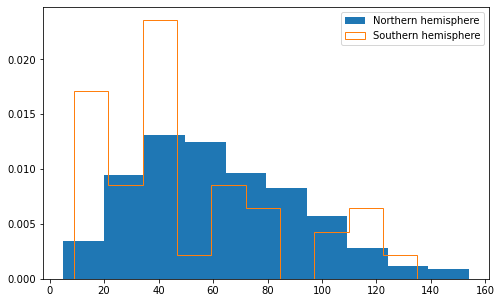

In [10]:
# PINT - northern vs. southern hemisphere
plt.figure(4, (8, 5))
pint['Hemisphere']=pint['SLAT']>=0
pint['Hemisphere']=pint['Hemisphere'].replace({True:"North", False:"South"})

north= pint[pint['Hemisphere']=="North"]
south = pint[pint['Hemisphere']=="South"]

plt.hist(north['VDM/VADM'], density = True, label = "Northern hemisphere")
plt.hist(south['VDM/VADM'], density = True,  histtype='step', label= "Southern hemisphere")
plt.legend();

In [11]:
hem_stats = pint.groupby("Hemisphere").describe()['VDM/VADM']
hem_stats['std_err']=[hem_stats.at['North',"std"]/np.sqrt(hem_stats.at['North',"count"]), \
                                    hem_stats.at['South',"std"]/np.sqrt(hem_stats.at['South',"count"])]
hem_stats

,count,mean,std,min,25%,50%,75%,max,std_err
Hemisphere,,,,,,,,,
North,291.0,62.498282,29.965771,5.0,40.0,58.0,83.0,154.0,1.756625
South,37.0,52.513514,34.499293,9.0,28.0,41.0,71.0,135.0,5.671649


In [12]:
# 2 sample Kolmogorov-Smirnov test
stats.ks_2samp(north['VDM/VADM'].values, south['VDM/VADM'].values)

KstestResult(statistic=0.2956255224296461, pvalue=0.004867192585160329)

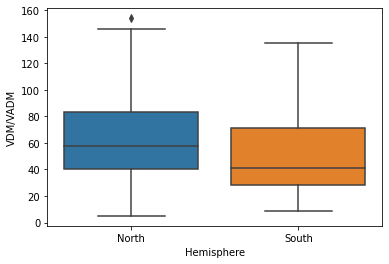

In [13]:
sns.boxplot(x="Hemisphere", y = "VDM/VADM", data = pint);

In [14]:
#find the M (g01 term) that minimizes the mean squared error 
min_mse =[np.inf, np.inf, np.inf]
mses= []

for m in np.linspace(pint['VDM/VADM'].min(), pint['VDM/VADM'].max(), 100):
   
    #intensity at the equator
    b = pmag.vdm_b(m*1e21, 0)*1e6
    
    # calculate mse 
    B_exp= b*np.sqrt(1+3 * np.cos(np.radians(90 - pint['SLAT']))**2)
    mse = sum((pint['F']-B_exp)**2)/pint['F'].size
    mses.append(mse)
    
    if mse <min_mse[0]:
        min_mse= [mse, b, m]
        
#equivalent VADM
best_vadm = min_mse[2]
 
print ("Best MSE")
print("\tmse:\t {:.2f}".format(min_mse[0]))
print("\tm:\t {:.2f} muT".format(min_mse[1]))
print("\tvadm:\t {:.2f} ZAm^2".format(best_vadm))

Best MSE
	mse:	 277.67
	m:	 21.14 muT
	vadm:	 54.67 ZAm^2


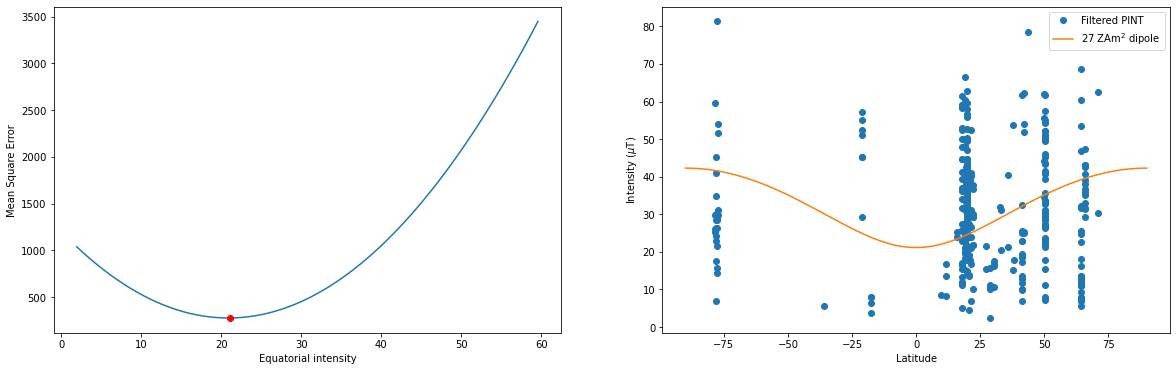

In [17]:
# mse
plt.figure(5, (20,6))

plt.subplot(121)
ms = np.linspace(pint['VDM/VADM'].min(), pint['VDM/VADM'].max(), 100)
x = pmag.vdm_b(ms*1e21, 0)*1e6
plt.plot(x, mses)

plt.xlabel("Equatorial intensity")
plt.ylabel("Mean Square Error")
plt.plot(min_mse[1],min_mse[0], "ro")




plt.subplot(122)
lats = np.linspace(-90, 90,300)
best_gad=  min_mse[1]*np.sqrt(1+3 * np.cos(np.radians(90 - lats))**2)
best_vadm = pmag.b_vdm( min_mse[1]*1e-6, 90)/1e21

plt.plot(pint['SLAT'], pint['F'], "o", label = "Filtered PINT")
plt.plot(lats, best_gad, label="{} ZAm$^2$ dipole".format(int(best_vadm)))
plt.xlabel("Latitude")
plt.ylabel("Intensity ($\mu$T)")
plt.legend();

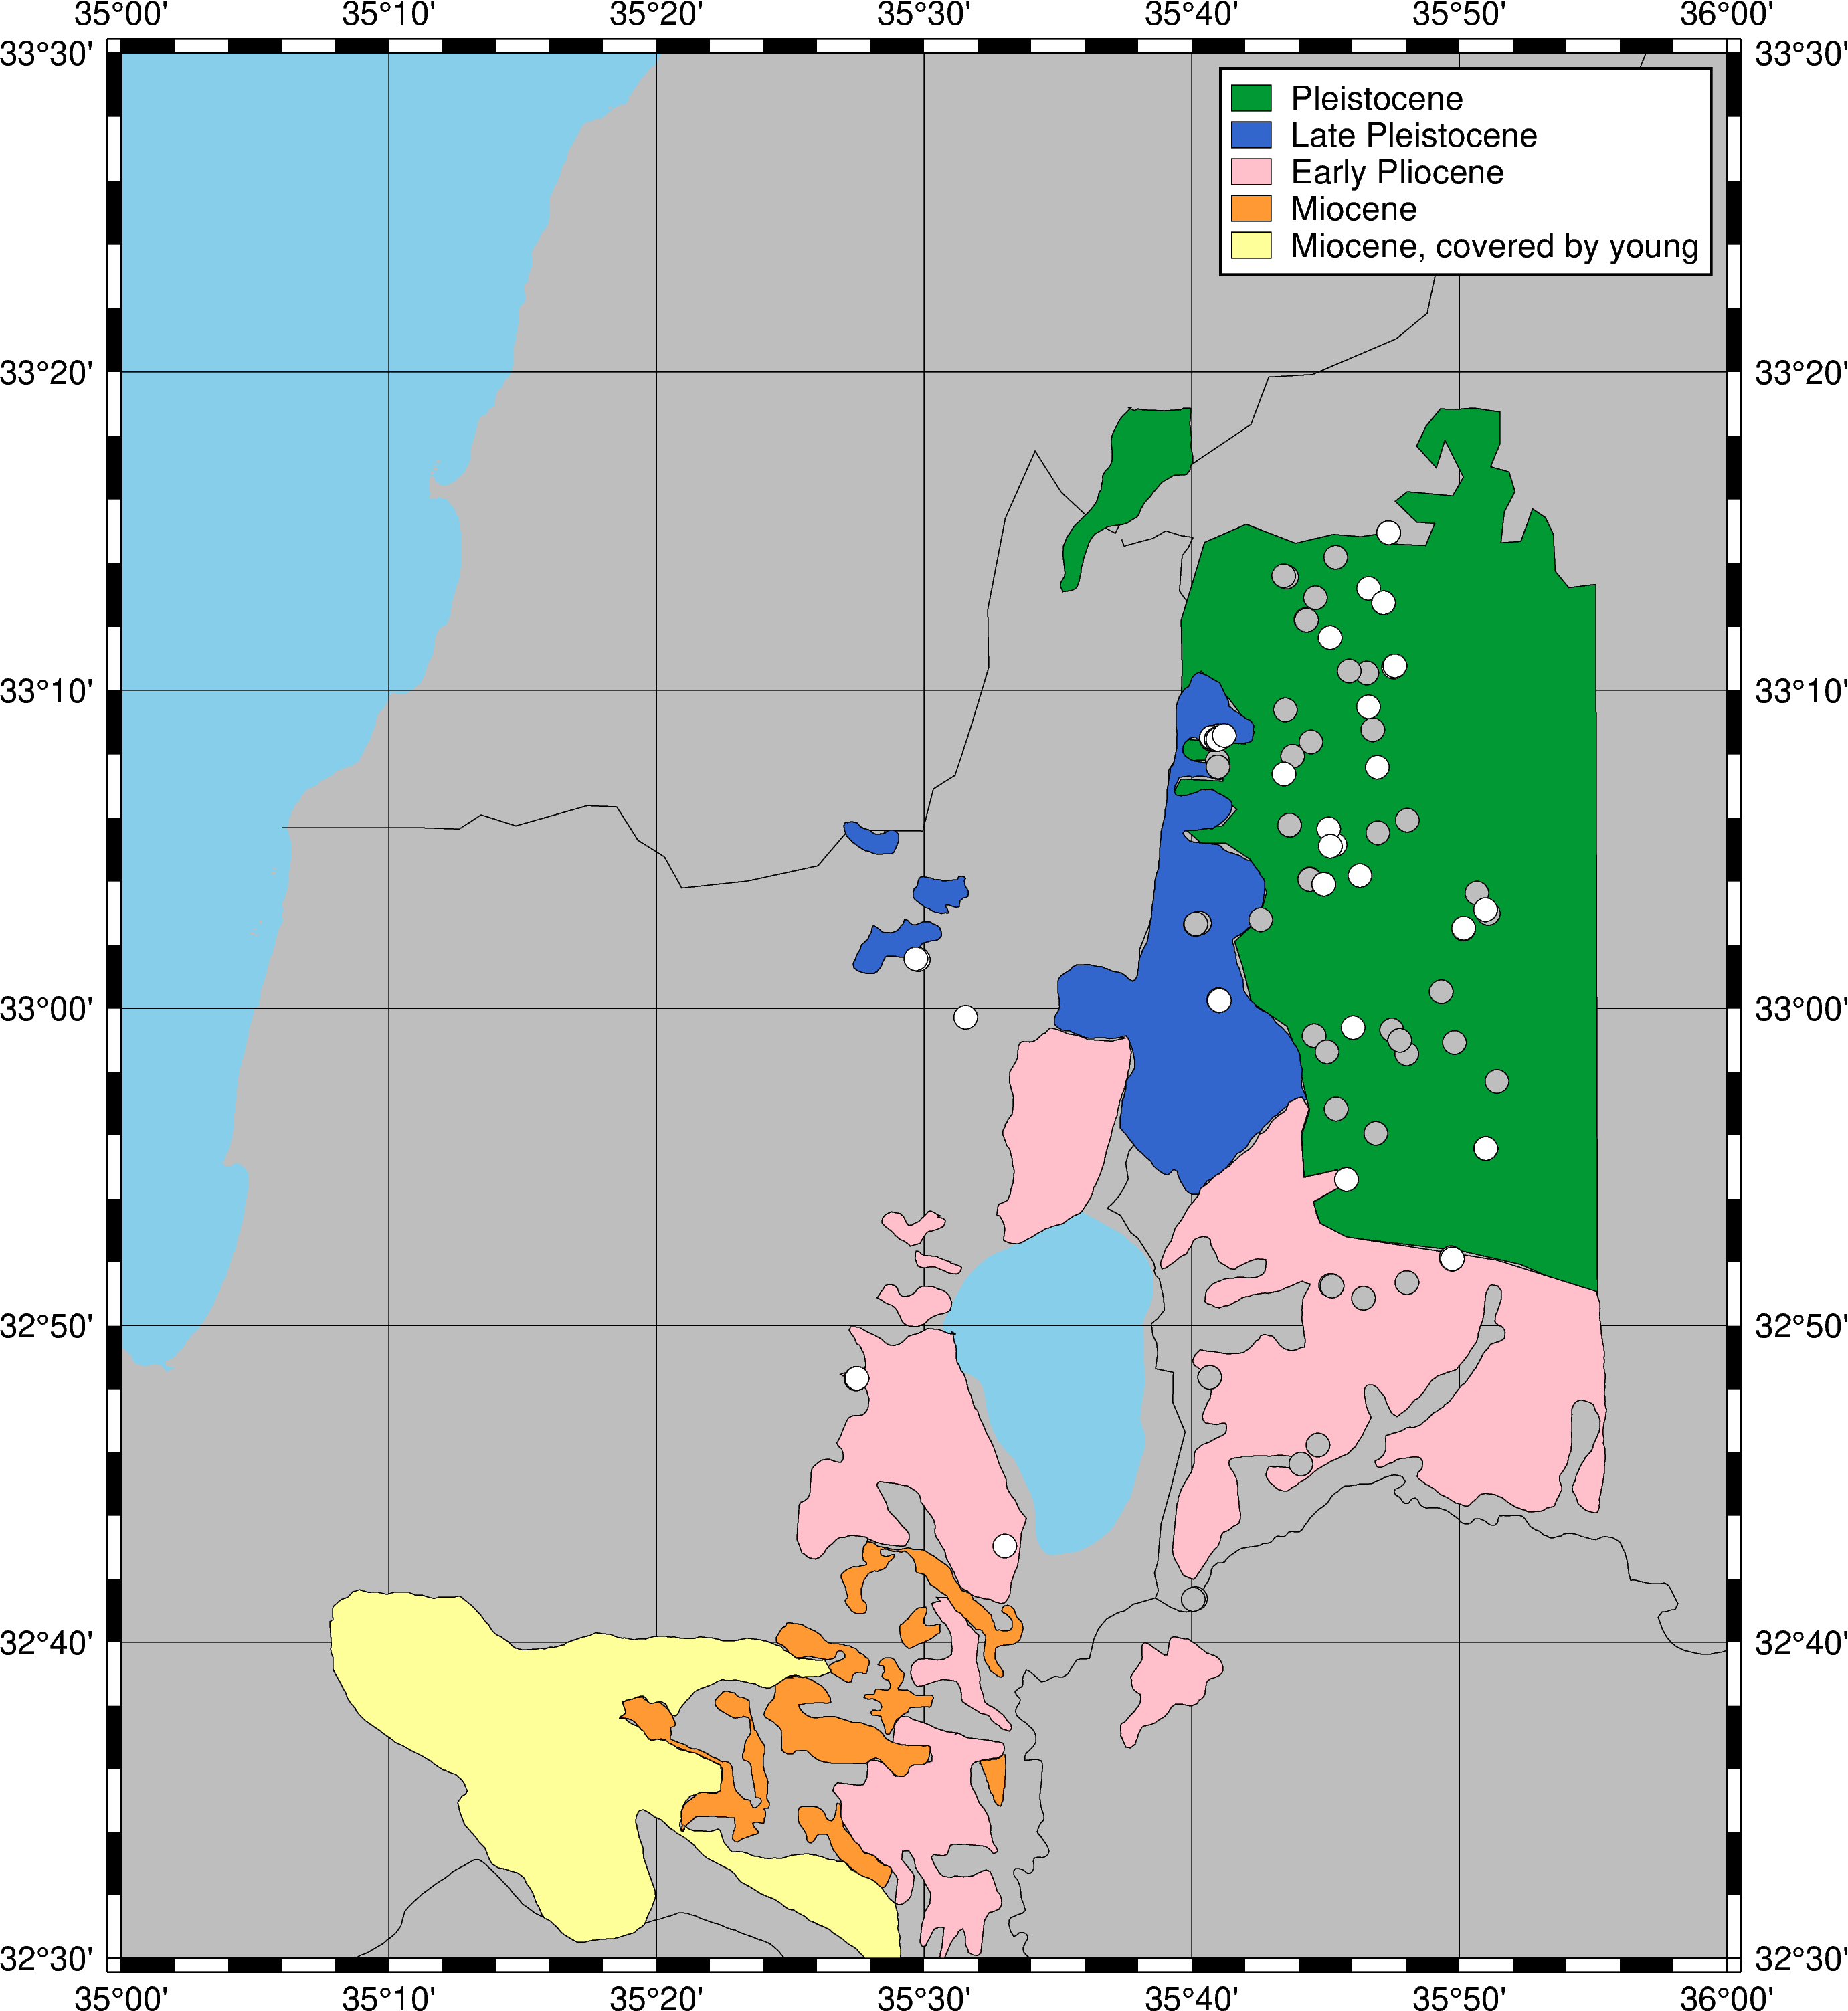

In [16]:
# site map
boundary_data = pd.read_csv("./geo_regions.csv")
coordinate_data = pd.read_csv("./coordinates.csv")


lon = [35, 36]
lat = [32.5, 33.5]
padding = 20

fig = pygmt.Figure()
fig.coast(projection = "M0/0/8i", region = [lon[0], lon[1],lat[0], lat[1]], frame = "afg", land = "gray", water = "skyblue", borders = 1)


colors=["#009933", "#3366cc", "pink", "#ff9933", "#ffff99", "#00cc99", "#669999"]
periods = ["Pleistocene", "Late Pleistocene", "Early Pliocene", "Miocene", "Miocene, covered by young"]
for i, period in enumerate(periods):
    regions = boundary_data[boundary_data['period']==period]
    for j in regions['zone'].unique():
        region_data = regions[regions['zone']==j]
        if (j == 1):
            fig.plot(x =region_data['lon'].values, y = region_data['lat'].values , color = colors[i], pen = "black", label = '"' + period +'"')
        else:
            fig.plot(x =region_data['lon'].values, y = region_data['lat'].values , color = colors[i], pen = "black")


#plot intensity sites
intensity_sites = coordinate_data[coordinate_data['Site'].str.contains("GHI")]
direction_sites = coordinate_data[coordinate_data['Site'].str.contains("GHI")==False]
fig.plot(x = direction_sites['Lon'].values, y = direction_sites['Lat'].values , style = "c0.3c", color = "grey", pen = "black")
fig.plot(x = intensity_sites['Lon'].values, y =intensity_sites['Lat'].values , style = "c0.3c", color = "white", pen = "black")



fig.legend()
fig.show(width=1000)